# OpenCV-Python 기초사용법

## 영상속성

In [1]:
import sys
import cv2
import numpy as np

In [2]:
# cv2.imread(filename[, flags]) -> retval

# retval
    # numpy.nbarray: retval.ndim/shape/size/dtype
    # dtype: uint8
    # shape: gray영상의 경우 (h,w) 또는 color (h,w, 3) 
    # gray영상 : cv2.CV_8UC1 -> numpy.uint8
    # color영상 : cv2.CV_8UC3 -> numpy.uint8

In [3]:
# 흑백의 경우
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
print(type(img1))
print(img1.shape) # gray의 경우 2dimension
print(img1.ndim)
print(cv2.CV_8UC1)

<class 'numpy.ndarray'>
(480, 640)
2
0


In [4]:
# 컬러의 경우
img1 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)
print(type(img1))
print(img1.shape) # 3의 의미 RGB (COLOR 일경우 나옴)
print(img1.ndim)
print(cv2.CV_8UC3)

<class 'numpy.ndarray'>
(480, 640, 3)
3
16


In [5]:
# 영상 불러오기
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
    print('Image load failed!')
    sys.exit()

# 영상의 속성 참조
print('type(img1):', type(img1))
print('img1.shape:', img1.shape)
print('img2.shape:', img2.shape)
print('img1.dtype:', img1.dtype)
print('img1.dtype:', img2.dtype)

print('img1.shape length:', len(img1.shape))
print('img2.shape length:', len(img2.shape))

type(img1): <class 'numpy.ndarray'>
img1.shape: (480, 640)
img2.shape: (480, 640, 3)
img1.dtype: uint8
img1.dtype: uint8
img1.shape length: 2
img2.shape length: 3


## 영상의 크기 참조

In [6]:
# row by col
h, w = img1.shape
print('img1 size: {} x {}'.format(w, h))

h, w = img2.shape[:2]
print('img2 size: {} x {}'.format(w, h))

# 이미지 도메인 가로 * 세로
# 픽셀 도메인 행 * 열

img1 size: 640 x 480
img2 size: 640 x 480


## 영상의 픽셀값 참조

In [7]:
x = 20
y = 30

p1 =img1[y,x]
print(p1)

p2 = img2[y, x]
print(p2) # B, G, R

252
[255 254 246]


In [8]:
'''
img1[10:20, 10:20] = 0
img2[10:20, 10:20] = (0, 0, 255)
'''
cv2.imshow('image', img1)
cv2.imshow('image2',img2)

cv2.waitKey()
cv2.destroyAllWindows()

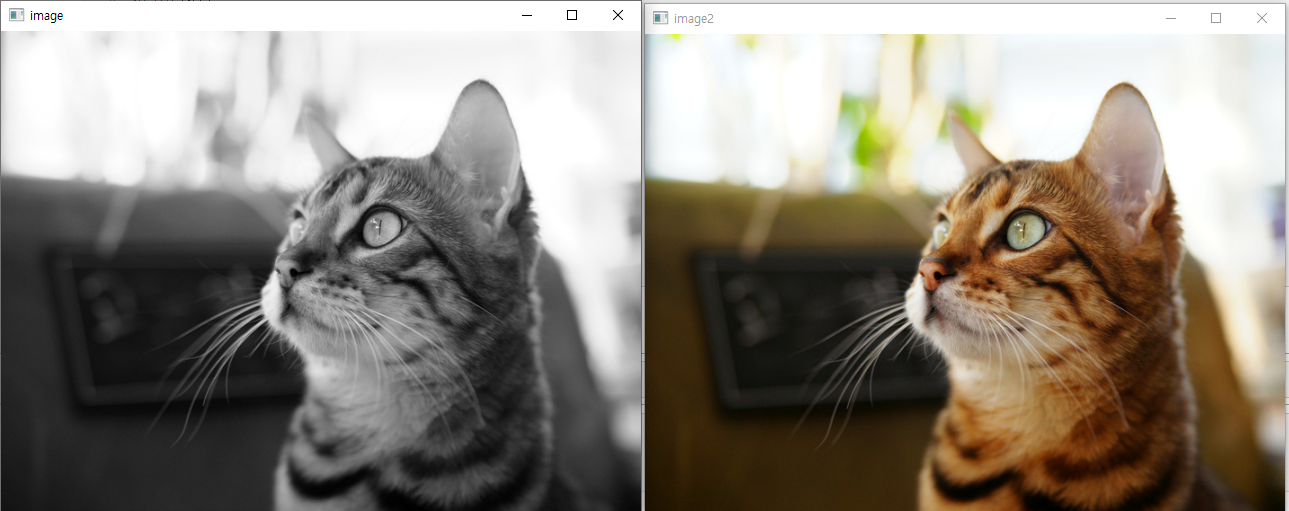

In [9]:
img1[10:20, 10:20] = 0 # 검은색 표시
img2[10:20, 10:20] = (0, 0, 255) # 빨간색 네모 표시

cv2.imshow('image', img1)
cv2.imshow('image2',img2)

cv2.waitKey()
cv2.destroyAllWindows()

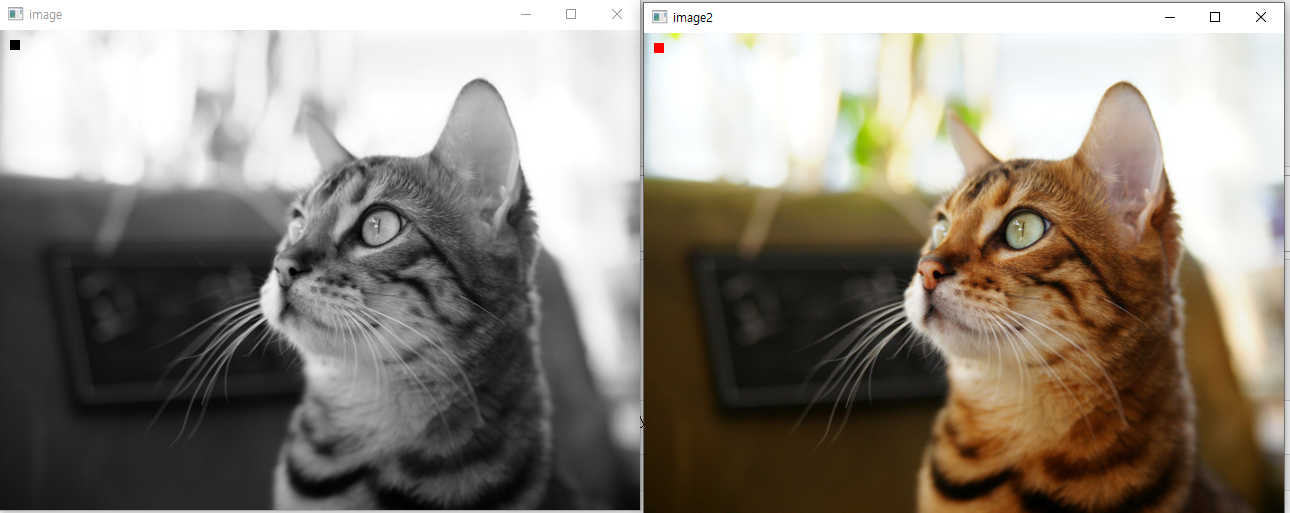

## 영상생성

In [10]:
'''
numpy.empty(shape, dtype)
numpy.zeros(shape, dtype)
numpy.ones(shape, dtype)
numpy.full(shape, fill_value, dtype)
'''

'\nnumpy.empty(shape, dtype)\nnumpy.zeros(shape, dtype)\nnumpy.ones(shape, dtype)\nnumpy.full(shape, fill_value, dtype)\n'

In [12]:
import numpy as np
import cv2

# unit8 - 8비트의 부호 없는 정수형 배열

# 새 영상 생성하기
img1 = np.empty((240, 320), dtype=np.uint8)       # grayscale image
# 기존에 쓰던 값이 있어서 덮어짐...
img2 = np.zeros((240, 320, 3), dtype=np.uint8)    # color image
img3 = np.ones((240, 320), dtype=np.uint8) * 255  # dark gray
img4 = np.full((240, 320, 3), (0, 255, 255), dtype=np.uint8)  # yellow
# (240, 320, 3) 이 사이즈에 (0, 255, 255)로 다 채워라

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey()
cv2.destroyAllWindows()

## 새영상 생성

In [15]:
# 영상 복사
# img1 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)
img1 = cv2.imread('HappyFish.jpg')

if img1 is None:
    print("image load failed")
    sys.exit()

img2 = img1 # 그냥 복사하면 원본의 주소를 복사해서 연결되어있음 따라서 copy()를써야함
img3 = img1.copy()

img1[:,:] = (0, 255, 255) # 노란색으로 

print(img1.shape)
print(img1.dtype)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)

cv2.waitKey()
cv2.destroyAllWindows()


(194, 259, 3)
uint8


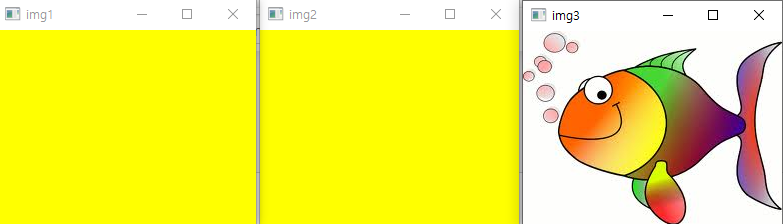

## 부분 영상 추출

In [17]:
img1 = cv2.imread('HappyFish.jpg')

img2 = img1[40:120, 30:150]  # numpy.ndarray의 슬라이싱
img3 = img1[40:120, 30:150].copy()

img2.fill(0)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)

cv2.waitKey()
cv2.destroyAllWindows()

# img2를 주소를 복사해서 0으로 바꿔서 1도 바뀜 

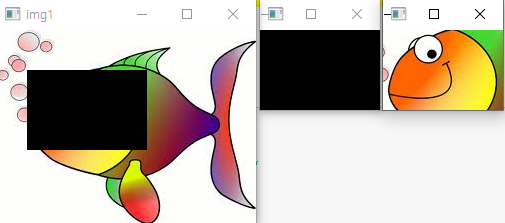

## 마스크 연산과 ROI

In [ ]:
# 마스크 영상을 이용한 영상 합성
src = cv2.imread('airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('field.bmp', cv2.IMREAD_COLOR)

if src is None or mask is None or dst is None:
    print('Image load failed!')
    sys.exit()
    

# 영상의 포맷과 형식이 같아야 함
# cv2.copyTo(src, mask, dst)
# dst = cv2.copyTo(src, mask)

# Using numpy
# dst[mask > 0] = src[mask > 0]

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()

## 알파 채널을 마스크 영상으로 이용

In [ ]:
src = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)
logo = cv2.imread('opencv-logo-white.png', cv2.IMREAD_UNCHANGED)

if src is None or logo is None:
    print('Image load failed!')
    sys.exit()

mask = logo[:, :, 3]    # mask는 알파 채널로 만든 마스크 영상
logo = logo[:, :, :-1]  # logo는 b, g, r 3채널로 구성된 컬러 영상
h, w = mask.shape[:2]
crop = src[10:10+h, 10:10+w]  # logo, mask와 같은 크기의 부분 영상 추출

cv2.copyTo(logo, mask, crop)
#crop[mask > 0] = logo[mask > 0]

cv2.imshow('src', src)
cv2.imshow('logo', logo)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()